# Decision Trees

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import plotly.express as px

In [4]:
df = pd.read_csv('datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Histogram of Features')

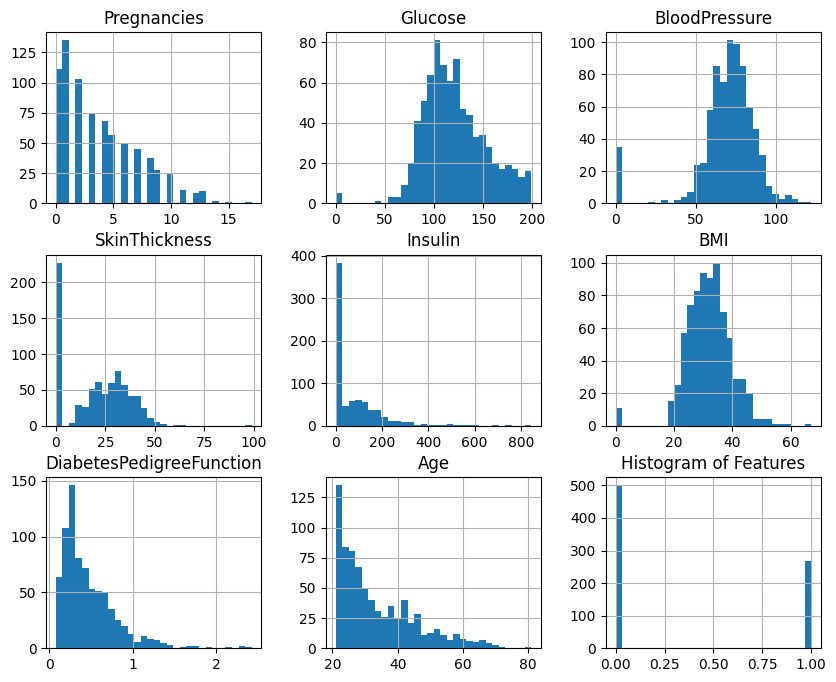

In [13]:
df.hist(bins=30, figsize=(10, 8))
plt.title('Histogram of Features')

In [33]:
df_dummy = df

<Axes: >

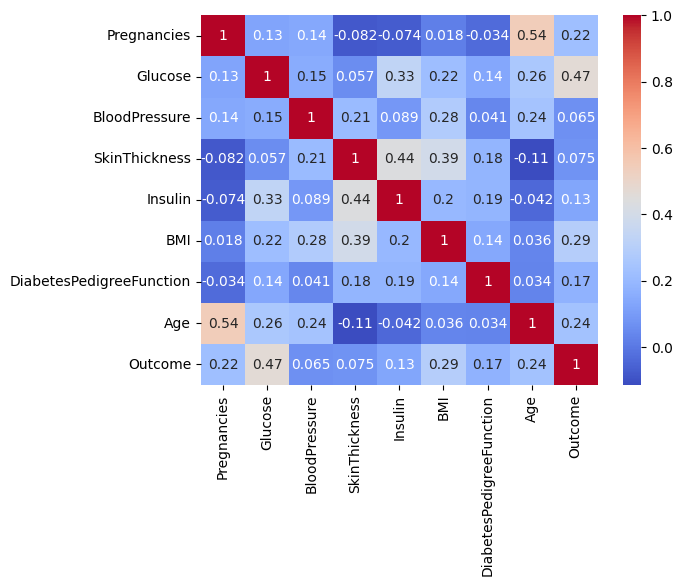

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

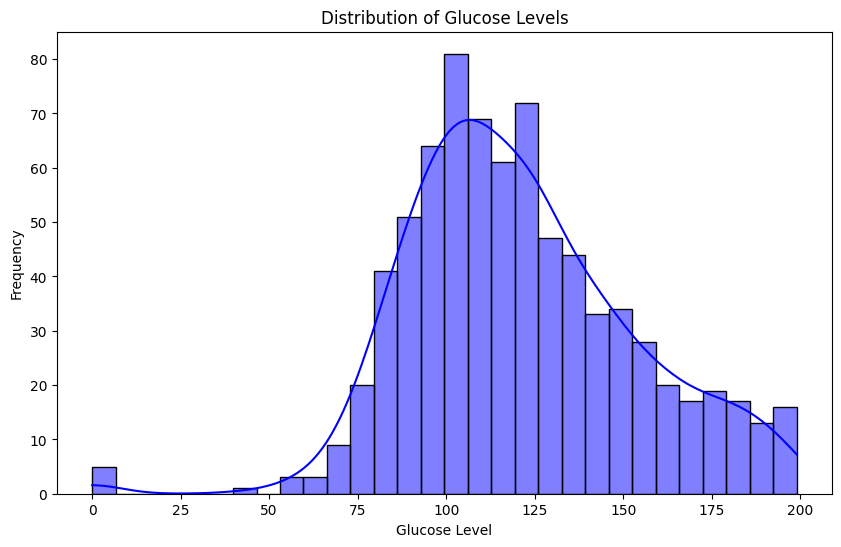

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

C:\Users\sushi\AppData\Local\Temp\ipykernel_23056\2084202241.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')


Text(0.5, 1.0, 'BMI Distribution by Diabetes Outcome')

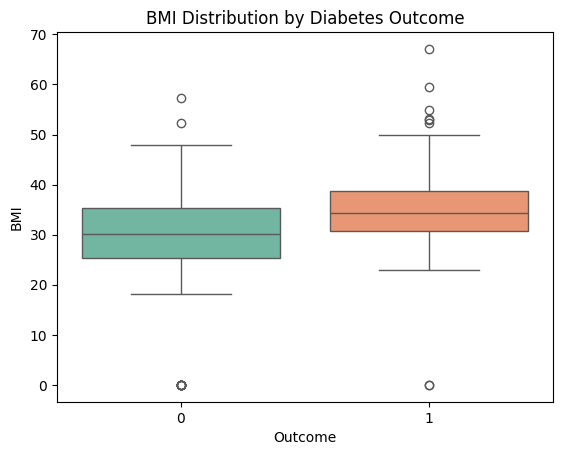

In [18]:
sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')
plt.title('BMI Distribution by Diabetes Outcome')

C:\Users\sushi\AppData\Local\Temp\ipykernel_23056\3395296067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')


Text(0.5, 1.0, 'Glucose Distribution by Diabetes Outcome')

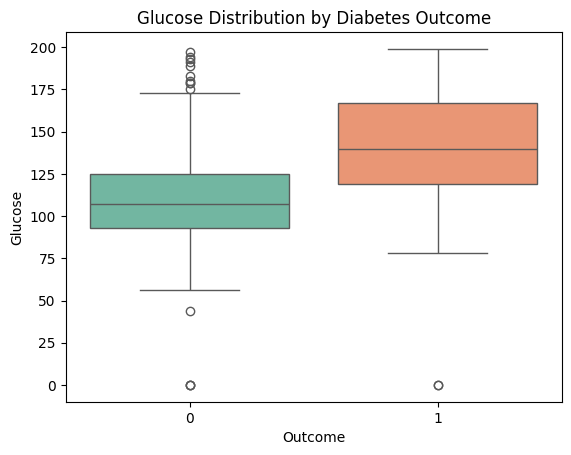

In [20]:
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title('Glucose Distribution by Diabetes Outcome')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



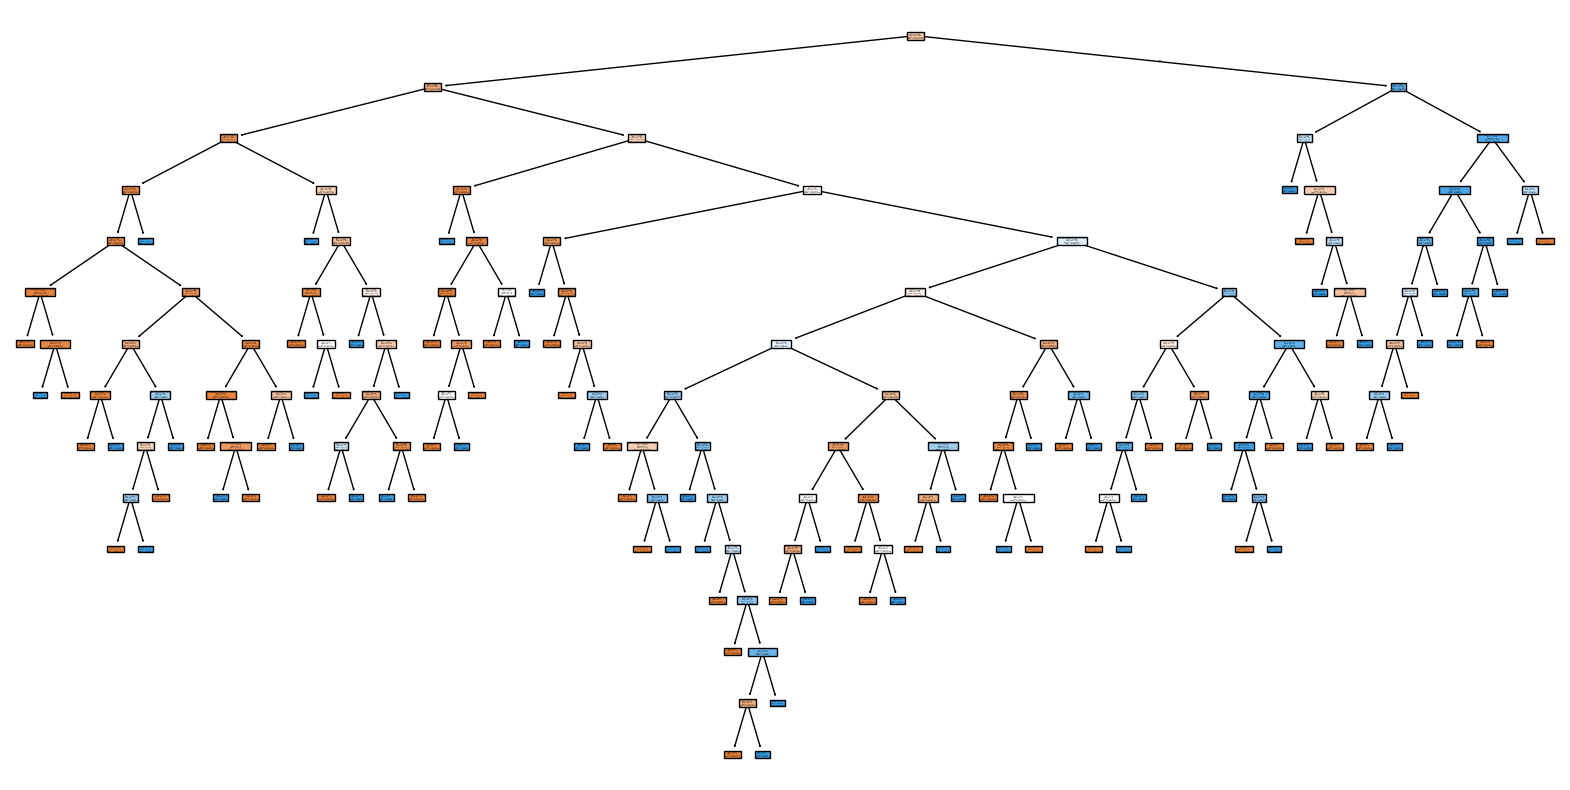

In [27]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7229437229437229
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       151
           1       0.58      0.71      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.74      0.72      0.73       231

